# Análisis Exploratorio de Datos (EDA) de Transacciones de Drones


Este análisis tiene como objetivo explorar un dataset de transacciones de drones, que contiene más de 700 filas y varias columnas clave como:
- Región (Region)
- País Solicitante (Seeker)
- País Proveedor (Supplier)
- Modelo de Plataforma (Platform Model)
- Tipo de Plataforma (Platform Type)
- Estado de la transacción (Status)
- Fechas de interés, orden y primera entrega.

Vamos a realizar un análisis exploratorio y visualizar los principales patrones y tendencias en los datos.


In [1]:

# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual
sns.set(style="whitegrid")


## Cargar y explorar el dataset

In [7]:

# Cargar el dataset desde un archivo CSV
df = pd.read_csv('../data/Proliferation_Master.csv')

# Mostrar las primeras filas del dataset
df.head()


,Entry Number,Region,Seeker,Supplier,Paltform Model,Platform Type,Year of Interest,Year of Order,Year of First Delivery,"Year of Identification, Completion, or Cancellation",Status,Source 1,Source 2,Source 3,Comments
0,1,North America,United States,Israel,Hunter,UAV,NaN,1992.0,1993.0,1996.0,Yes,SIPRI,NaN,NaN,"SIPRI Comments: ""Deal incl. 7 ground-control s..."
1,2,Indo-Pacific,Singapore,Israel,Searcher Mk II,UAV,NaN,1993.0,1994.0,1995.0,Yes,SIPRI,NaN,NaN,NaN
2,3,Europe,France,Israel,Hunter,UAV,NaN,1995.0,1997.0,1997.0,Yes,SIPRI,NaN,NaN,"SIPRI Comments: ""$50m deal"""
3,4,Europe,Netherlands,France,Sperwer,UAV,NaN,1995.0,2000.0,2001.0,Yes,SIPRI,NaN,NaN,"SIPRI Comments: ""$82m deal; retired in 2011"""
4,5,Indo-Pacific,Sri Lanka,Israel,Scout,UAV,NaN,1995.0,1998.0,1998.0,Yes,SIPRI,NaN,NaN,"SIPRI Comments: ""Secondhand but modernized bef..."


## Descripción básica del dataset

In [10]:

# Mostrar información general del dataset
df.info()

# Descripción estadística básica
df.describe()

print(df.columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Entry Number                                          720 non-null    int64  
 1   Region                                                720 non-null    object 
 2   Seeker                                                720 non-null    object 
 3   Supplier                                              720 non-null    object 
 4   Paltform Model                                        720 non-null    object 
 5   Platform  Type                                        720 non-null    object 
 6   Year of Interest                                      73 non-null     float64
 7   Year of Order                                         481 non-null    float64
 8   Year of First Delivery                                237 no

<h1>Borrar espacio columnas</h1>

In [13]:
# Limpiar los espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

# Verificar que los espacios hayan sido eliminados
print(df.columns)

# Ahora deberías poder trabajar con la columna sin problemas
df['Year of Interest'] = df['Year of Interest'].fillna(0)


Index(['Entry Number', 'Region', 'Seeker', 'Supplier', 'Paltform Model',
       'Platform  Type', 'Year of Interest', 'Year of Order',
       'Year of First Delivery',
       'Year of  Identification, Completion, or Cancellation', 'Status',
       'Source 1', 'Source 2', 'Source 3', 'Comments'],
      dtype='object')


## Manejo de valores faltantes

In [14]:

# Verificar valores faltantes
df.isnull().sum()

# Opcional: Limpiar o imputar valores faltantes si es necesario
df['Year of Interest'] = df['Year of Interest'].fillna(0)


## Distribución de transacciones por Región

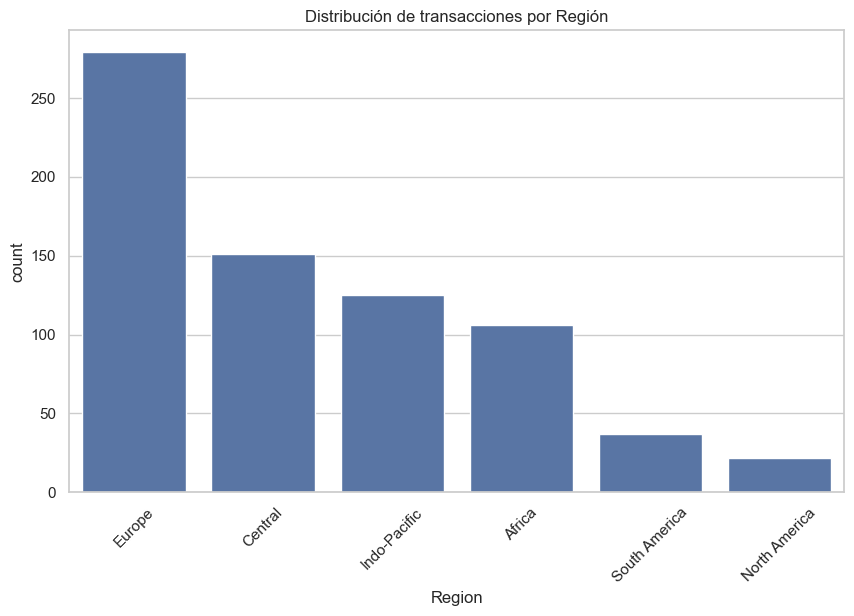

In [15]:

# Crear un gráfico de barras de la distribución por Región
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribución de transacciones por Región')
plt.show()


## Distribución de Tipos de Plataforma

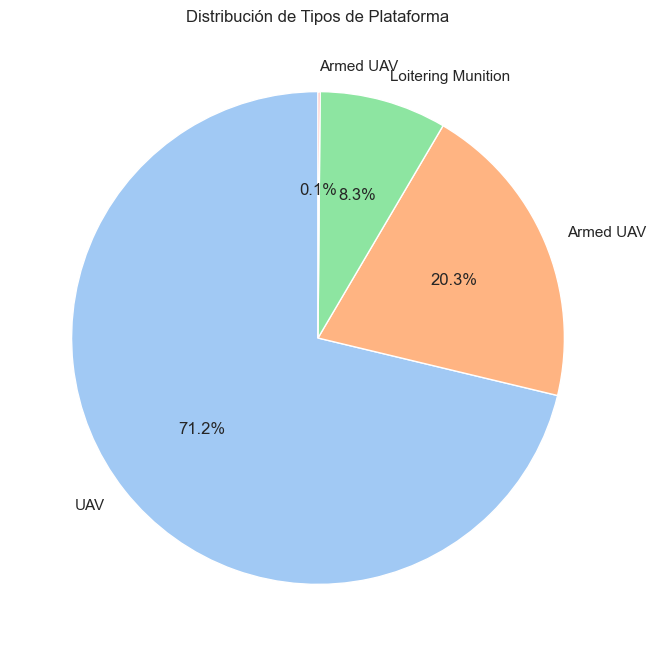

In [19]:
plt.figure(figsize=(8, 8))
df['Platform  Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.title('Distribución de Tipos de Plataforma')
plt.show()


## Análisis temporal: Año de Primera Entrega

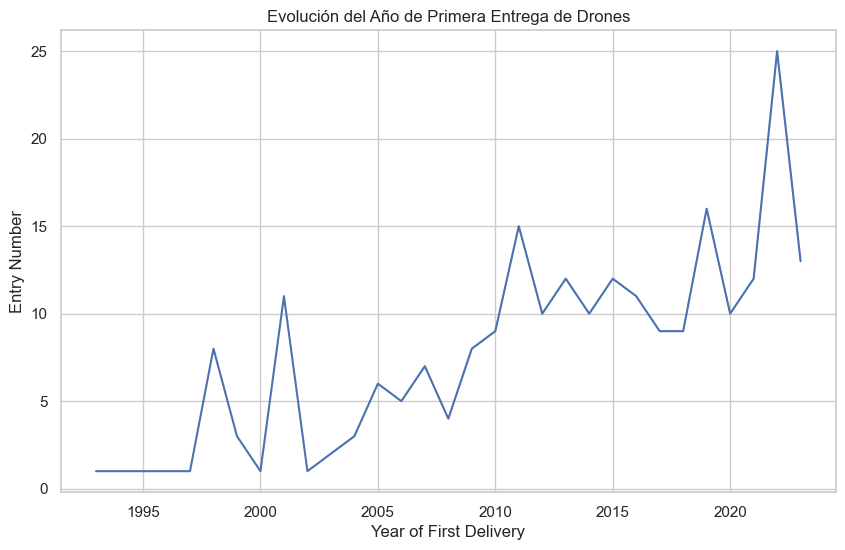

In [21]:
# Crear un gráfico de líneas para mostrar la evolución del Año de Primera Entrega
plt.figure(figsize=(10, 6))

# Corregir el uso del estimator
sns.lineplot(data=df, x='Year of First Delivery', y='Entry Number', estimator='size')

plt.title('Evolución del Año de Primera Entrega de Drones')
plt.show()


## Análisis del Estado de las Transacciones

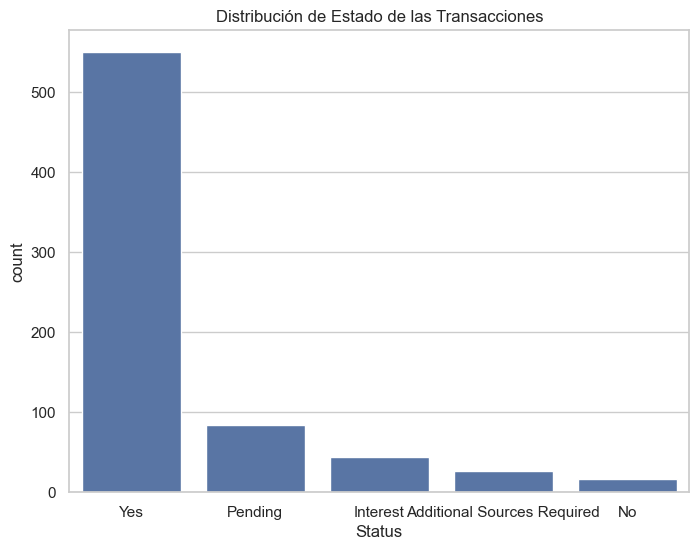

In [22]:

# Crear un gráfico de barras del estado de las transacciones
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)
plt.title('Distribución de Estado de las Transacciones')
plt.show()



## Conclusiones

Este análisis exploratorio nos permitió observar las siguientes tendencias clave:
1. La región con más transacciones de drones es [la más común].
2. El tipo de plataforma más común es [el tipo principal].
3. Se observa un aumento/disminución en las primeras entregas de drones desde [año de referencia].
4. El estado más común de las transacciones es [estado principal].

Este análisis puede ser utilizado como base para futuros estudios más detallados sobre la proliferación de drones en distintas regiones y sectores.
